<a href="https://colab.research.google.com/github/Pragna235/Decision-Tree-Model---Tennis-Dataset/blob/main/Decision_Tree_Model_on_Tennis_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Decision Tree Machine Learning Model Building on Tennis Dataset


# Importing Modules and Libraries

In [ ]:
!pip install decision-tree-id3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.9 MB/s eta 0:00:00
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15939 sha256=046a71ac1314b1f09b6a473c719c370cfd96050dc0c8c93a2558bd38a6d43ad3
  Stored in directory: /root/.cache/pip/wheels/b5/48/52/e8ac7a547a6343fce8e441f4db4a9052c7a8547fd91f413363
Successfully built decision-tree-id3


In [ ]:
#Import necessary modules and libraries
import matplotlib.pyplot as plt
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

# Reading Tennis Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the tennis dataset
tennis_data = pd.read_csv("/content/drive/MyDrive/PlayTennis.csv")
tennis_data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
# print first 5 rows of dataset
tennis_data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [ ]:
#print last 5 rows of the dataset
tennis_data.tail()

,Outlook,Temperature,Humidity,Wind,Play Tennis
9,1,2,1,1,1
10,2,2,1,0,1
11,0,2,0,0,1
12,0,1,1,1,1
13,1,2,0,0,0


In [ ]:
# print shape of the dataset
tennis_data.shape

(14, 5)

# Converting categorical data to numeric data

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
tennis_data['Outlook'] = label.fit_transform(tennis_data['Outlook'])
tennis_data['Temperature'] = label.fit_transform(tennis_data['Temperature'])
tennis_data['Humidity'] = label.fit_transform(tennis_data['Humidity'])
tennis_data['Wind'] = label.fit_transform(tennis_data['Wind'])
tennis_data['Play Tennis'] = label.fit_transform(tennis_data['Play Tennis'])

tennis_data
#One hot encoding can also be done

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


# Defining Input and Output Features

In [ ]:
# Segregate the input and output features
y = tennis_data["Play Tennis"]
x = tennis_data.drop(["Play Tennis"],axis=1)

In [ ]:
# Initialize & train decision tree model
from sklearn.tree import DecisionTreeClassifier,export_text

clf = DecisionTreeClassifier(criterion="entropy")   #Id3 algorithm uses entropy
clf.fit(x,y)

#Print the textual representation of the decision tree
tree_rules = export_text(clf,feature_names=list(x.columns))
print(tree_rules)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



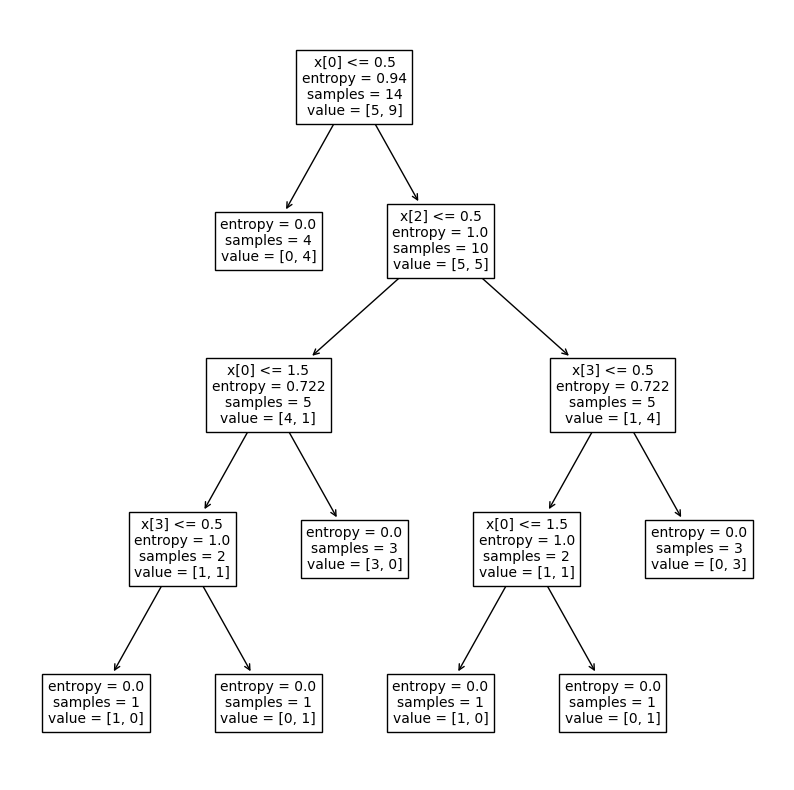

In [ ]:
#Generate & print the textual representation of the decision tree
from sklearn import tree

fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
plt.show()

# Visualization


In [ ]:
from sklearn.tree import export_graphviz
from id3 import Id3Estimator,export_text
import graphviz

#Export the decision tree as a DOT file
dot_data = export_graphviz(clf,feature_names=list(x.columns),filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)

# Save the graph as a png file or display it
graph.render("decision_tree",format='png',cleanup=True)

'decision_tree.png'

# Fitting the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#split the dataset into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

#create object estimator
estimator = Id3Estimator()
# fit the training data into the object and train the model
estimator.fit(x_train,y_train)
#test the estimator using independent features and get the predicted values
y_pred = estimator.predict(x_test)

#get the classification report of the actual and predicted values
print("Classification Report : ")
print(classification_report(y_test,y_pred))

#print the accuracy score of the actual and predicted values
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy Score :  1.0


# Try the tree_rules for the training dataset


In [ ]:
# Initialize & train decision tree model
from sklearn.tree import DecisionTreeClassifier,export_text
from id3 import Id3Estimator,export_text

#Id3 algorithm uses entropy
estimator = Id3Estimator()
estimator.fit(x_train,y_train)

#Print the textual representation of the decision tree
tree_rules = export_text(estimator.tree_,feature_names=list(x_train.columns))
print(tree_rules)


Outlook <=0.50: 1 (3) 
Outlook >0.50
|   Humidity <=0.50
|   |   Wind <=0.50: 0 (2) 
|   |   Wind >0.50: 0 (1/1) 
|   Humidity >0.50
|   |   Wind <=0.50
|   |   |   Temperature <=1.00: 0 (1) 
|   |   |   Temperature >1.00: 1 (1) 
|   |   Wind >0.50: 1 (2) 

